# 1. BUSINESS UNDERSTANDING

## 1.1 BUSINESS OVERVIEW

SyriaTel is a phone and internet company. Its income mainly comes from customers who keep paying for their service every month. Getting new customers is expensive, so it is usually cheaper and more profitable to keep the customers they already have.

## 1.2 PROBLEM STATEMENT

SyriaTel loses some customers every month when they move to other providers. This loss, reduces the revenue and forces the company to spend more money on advertising and promotions to replace lost customers. Attracting new users is important, but it costs much more than keeping existing ones. Without knowing which customers are likely to leave, SyriaTel cannot act early to keep them. A clear way to predict company losses is need for the company to take action, reduce losses, and focus more on growing its customer base.

## 1.3 BUSINESS OBJECTIVES

### 1.3.1 MAIN OBJECTIVES

Find out which SyriaTel customers might leave soon and to Build a simple model to predict this which will help the company keep those customers and save money.

### 1.3.2 SPECIFIC OBJECTIVES

1. To identify patterns in customer data that indicate a higher chance of churn.

2. To determine the main factors that cause customers to leave SyriaTel.

3. To help the company reduce costs of acquiring new customers by keeping existing ones longer.

4. To support business growth by improving customer satisfaction and loyalty.

5. To give SyriaTel useful insights for creating retention strategies such as offers, discounts, or improved customer service.


### 1.3.3 RESEARCH QUESTIONS

1. Which customers are most likely to leave?

2. Can we predict churn before it happens?

3. What actions can SyriaTel take to keep them?

4. How does lower churn help revenue grow?

## 1.4 SUCCESS CRITERIA

To sucesfully build a model that predicts churn reliablywe need to identify the main reasons why customers leave which will help SyriaTel reduce churn and save revenue.

# 2. DATA UNDERSTANDING


- The data was gotten from Kaggle. (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset
- It contains 21 columns and 3333 rows.
- The dataset consists of float, integer, boolean and object data types.
- The dataset contains information on customer usage behavior, account details, service plans, and whether they churned or not.
- The column names are:
   1. **State**                  
   2. **Account length**                        
   3. **Area code**      
   4. **Phone number**         
   5. **International plan**     
   6. **Voice mail plan**       
   7. **Number vmail messages**   
   8. **Total day minutes**      
   9. **Total day calls**        
   10. **Total day charge**     
   11. **Total eve minutes**
   12. **Total eve  calls**
   13. **Total eve charge**      
   14. **Total night minutes**     
   15. **Total night calls**   
   16. **Total night charge**     
   17. **Total intl minutes**   
   18. **Total intl calls**    
   19. **Total intl charge**     
   20. **Customer service calls**
   21. **Churn**           

# 3. DATA PREPARATION

In [42]:
#importing
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [4]:
#Load dataset
df=pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [5]:
#general info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [7]:
# Summary statistics
print(df.describe())

       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

In [8]:
#check for missing values
print(df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [9]:
#cheaking for duplicates
df.duplicated().sum()

0

In [10]:
#Clean column names
df.columns = df.columns.str.lower().str.replace(" ", "_")


In [13]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

In [21]:
#class imbalance
df["churn"].value_counts(normalize=True)


churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

In [15]:
print(df.groupby("churn")[["total_day_minutes", "total_day_calls", "total_day_charge"]].mean())


       total_day_minutes  total_day_calls  total_day_charge
churn                                                      
False         175.175754       100.283158         29.780421
True          206.914079       101.335404         35.175921


# 4. EXPLORATORY DATA ANALYSIS

## BAR GRAPH

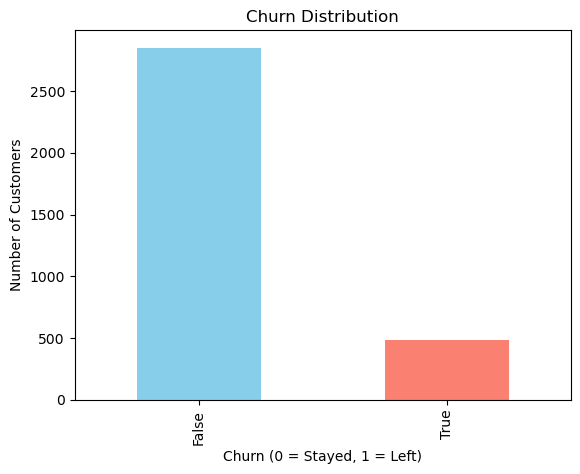

In [37]:
# Distribution of churn (how many customers stayed vs. left)
df["churn"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = Stayed, 1 = Left)")
plt.ylabel("Number of Customers")
plt.show()

## HISTOGRAM

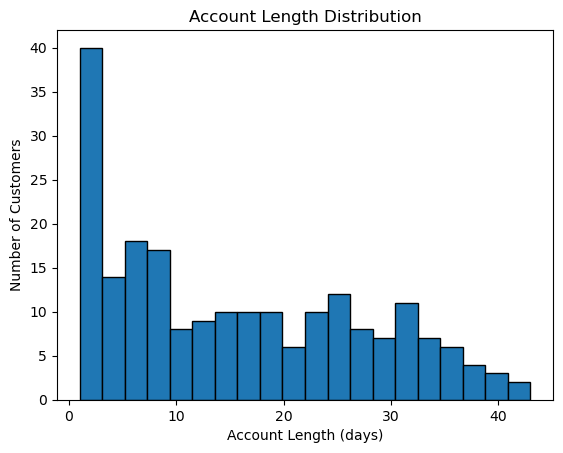

In [38]:
#histogram of the length of the period customers stayed
df["account_length"].value_counts().plot(kind="hist", edgecolor="black", bins=20)

plt.title("Account Length Distribution")
plt.xlabel("Account Length (days)")
plt.ylabel("Number of Customers")
plt.show()

## BOXPLOT

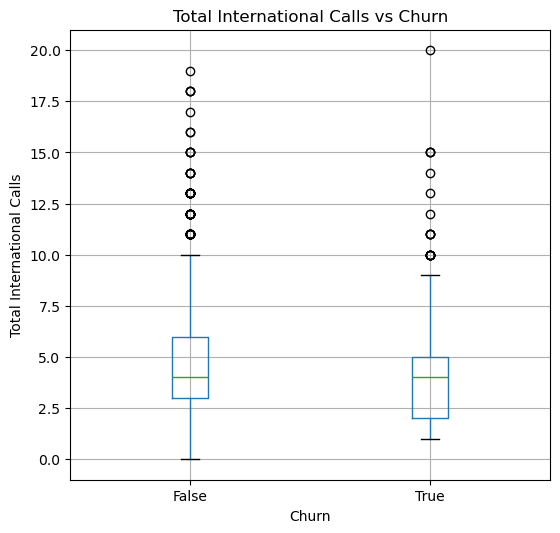

In [39]:
#It compares to show among those who stayed or those who left which group makes more or fewer international calls
df.boxplot(column="total_intl_calls", by="churn", figsize=(6,6))

plt.title("Total International Calls vs Churn")
plt.suptitle("") 
plt.xlabel("Churn")
plt.ylabel("Total International Calls")
plt.show()


## SCATTER PLOT

In [ ]:
#how much income was made per minute
df.head(20).plot(kind="scatter", x="total_day_minutes", y="total_day_charge")

plt.title("Day Minutes vs Day Charge")
plt.xlabel("Total Day Minutes")
plt.ylabel("Total Day Charge")
plt.show()


## LINE GRAPH

In [ ]:
#To know how many customers are unhappy with the service and are more likely to leave
df["customer_service_calls"].value_counts().sort_index().plot(kind="line")

plt.title("Customer Service Calls Distribution")
plt.xlabel("Number of Calls")
plt.ylabel("Number of Customers")
plt.show()


## CORRELATION ANALYSIS

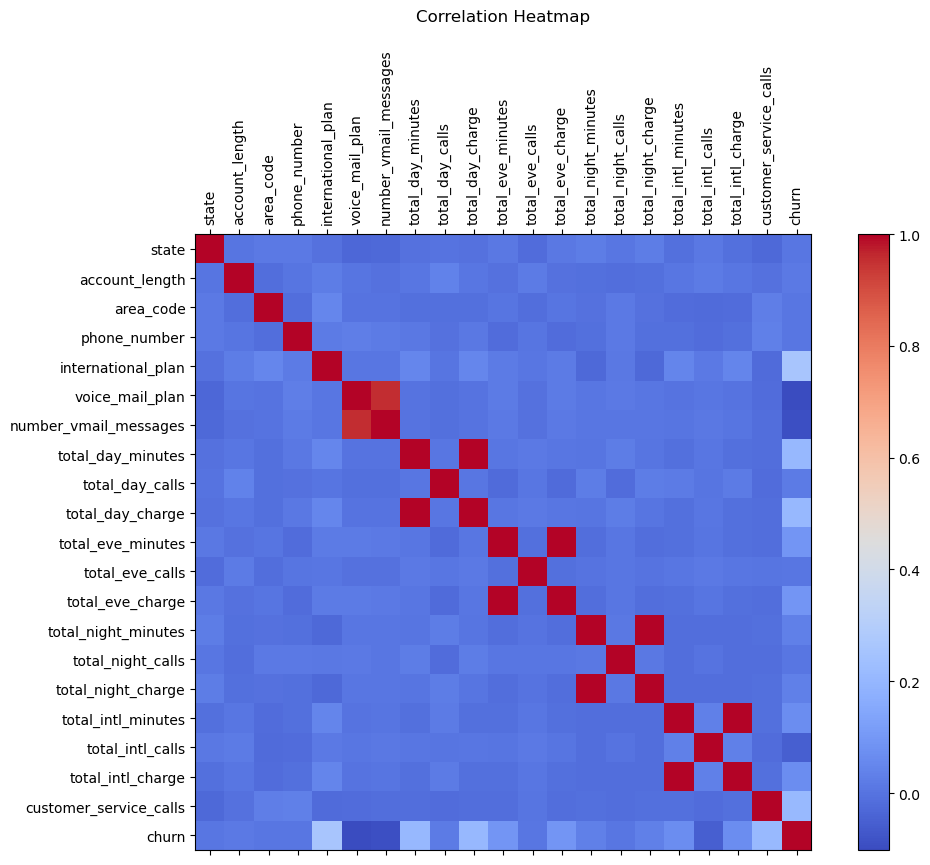

In [40]:
# Correlation matrix
corr_matrix = df.corr()
#correlation heatmap
fig, ax = plt.subplots(figsize=(12,8))
cax = ax.matshow(corr_matrix, cmap="coolwarm")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar(cax)
plt.title("Correlation Heatmap", pad=20)
plt.show()

## TRAIN SPLIT TEST

In [20]:
#Train-test split(80% training data, 20% testing data)
#x-feature, y-target
X = df.drop("churn", axis=1)
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2666, 20)
Test shape: (667, 20)


# 5. MODELING

## LOGISTIC REGRESSION

In [45]:
# Build Logistic Regression model
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
#Train the model 
log_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test_scaled)


In [46]:
# Make predictions
y_pred_log = log_model.predict(X_test_scaled)

In [47]:
# Evaluate performance
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Results:
Accuracy: 0.856071964017991

Confusion Matrix:
 [[548  22]
 [ 74  23]]

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       570
        True       0.51      0.24      0.32        97

    accuracy                           0.86       667
   macro avg       0.70      0.60      0.62       667
weighted avg       0.83      0.86      0.83       667



In [48]:
#logistic regression with balancing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000, class_weight="balanced")
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7646176911544228

Confusion Matrix:
 [[437 133]
 [ 24  73]]

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.77      0.85       570
        True       0.35      0.75      0.48        97

    accuracy                           0.76       667
   macro avg       0.65      0.76      0.66       667
weighted avg       0.86      0.76      0.79       667



## ROC CURVE

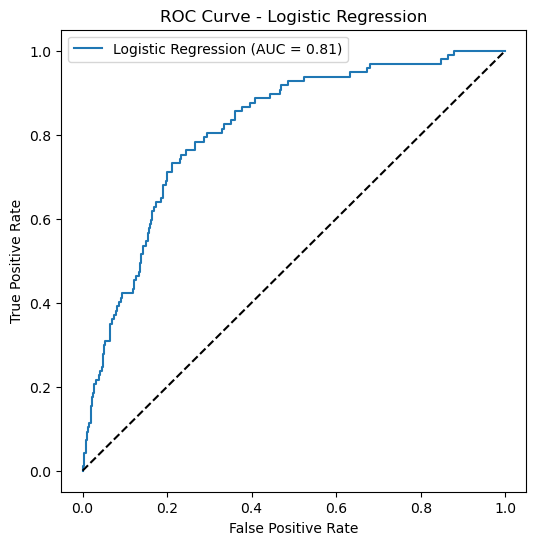

In [52]:
# Get predicted probabilities for churn = 1
y_pred_prob = log_model.predict_proba(X_test_scaled)[:, 1]

# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

## DECISION TREES

In [23]:
# Build Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [24]:
# Make predictions
y_pred_tree = tree_model.predict(X_test)

In [25]:
# Evaluate performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9025487256371814

Confusion Matrix:
 [[559  11]
 [ 54  43]]

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.95       570
        True       0.80      0.44      0.57        97

    accuracy                           0.90       667
   macro avg       0.85      0.71      0.76       667
weighted avg       0.90      0.90      0.89       667



In [26]:
#decision tree with balancing
tree_model = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight="balanced")
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.8545727136431784

Confusion Matrix:
 [[509  61]
 [ 36  61]]

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.89      0.91       570
        True       0.50      0.63      0.56        97

    accuracy                           0.85       667
   macro avg       0.72      0.76      0.74       667
weighted avg       0.87      0.85      0.86       667



***Accuracy***-  how often the model is correct.

***Confusion Matrix*** -

- *Top-left*: Correctly predicted “Stayed”

- *Bottom-right*: Correctly predicted “Churned”

- *Off-diagonal*: Mistakes

***Classification Report***- shows precision, recall, and F1-score for each class.

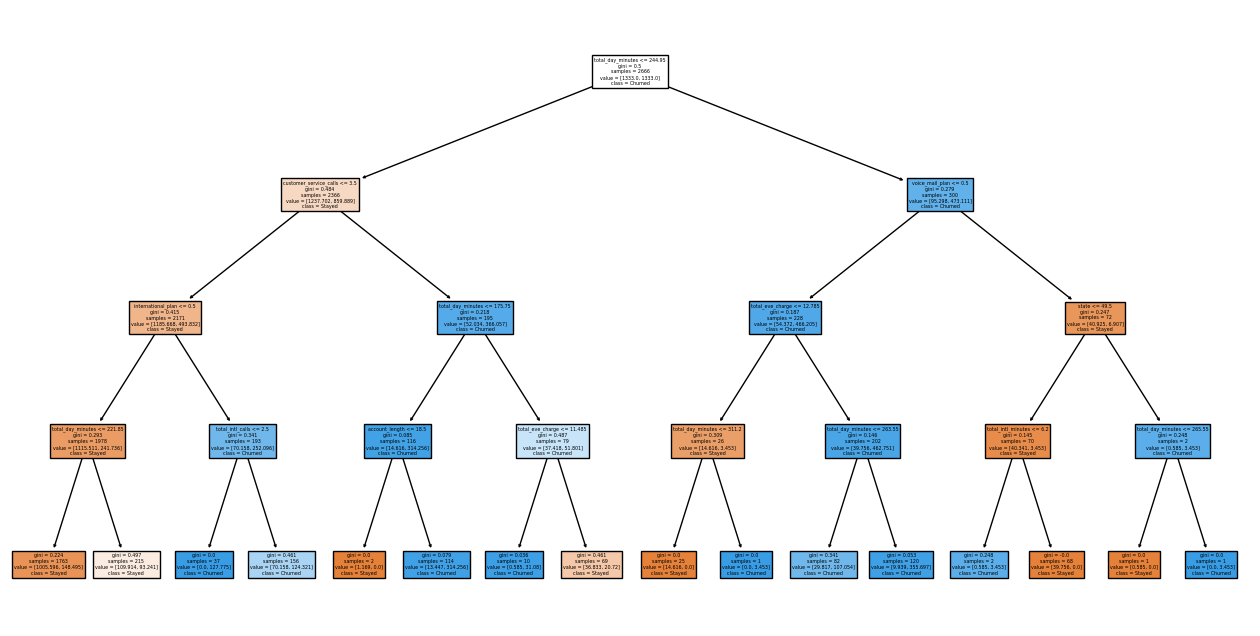

In [27]:
plt.figure(figsize=(16,8))
plot_tree(tree_model, feature_names=X.columns, class_names=["Stayed","Churned"], filled=True)
plt.show()


## ROC CURVE

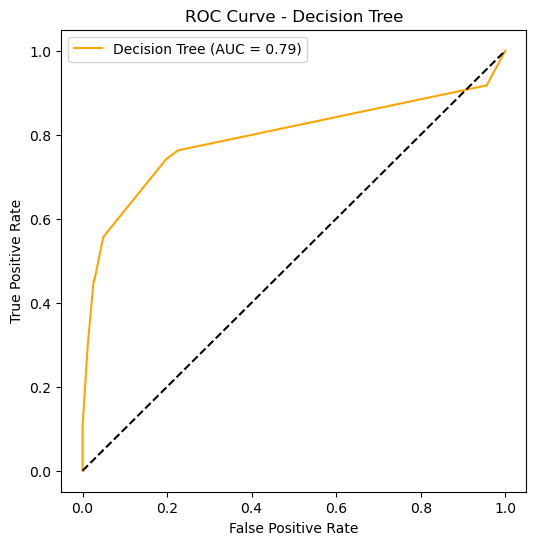

In [53]:
# Get predicted probabilities for churn = 1
y_pred_prob_tree = tree_model.predict_proba(X_test)[:, 1]

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=(6,6))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_tree:.2f})", color="orange")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()


# 6. EVALUATION

#### comparing logistic regression and decision tree

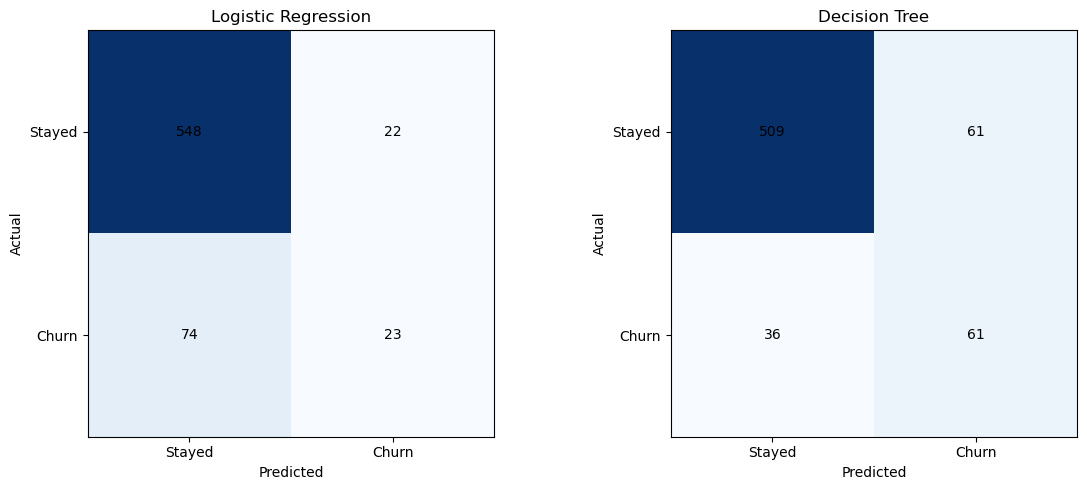

In [34]:

# Get confusion matrix 
cm_log = confusion_matrix(y_test, y_pred_log)
cm_tree = confusion_matrix(y_test, y_pred_tree)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix plot
axes[0].imshow(cm_log, cmap="Blues")
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_xticks([0, 1])
axes[0].set_yticks([0, 1])
axes[0].set_xticklabels(["Stayed", "Churn"])
axes[0].set_yticklabels(["Stayed", "Churn"])

for i in range(2):
    for j in range(2):
        axes[0].text(j, i, cm_log[i, j], ha="center", va="center", color="black")

# Decision Tree Confusion Matrix
axes[1].imshow(cm_tree, cmap="Blues")
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(["Stayed", "Churn"])
axes[1].set_yticklabels(["Stayed", "Churn"])

for i in range(2):
    for j in range(2):
        axes[1].text(j, i, cm_tree[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

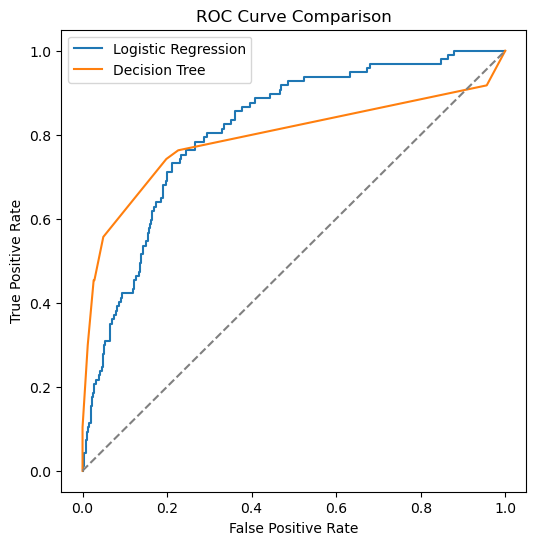

In [54]:
# ROC Curve ComparisoN
y_prob_log = log_model.predict_proba(X_test_scaled)[:,1]
y_prob_tree = tree_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

plt.figure(figsize=(6,6))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.plot([0,1],[0,1],"--", color="gray")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [36]:
#Compare model accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))


Logistic Regression Accuracy: 0.856071964017991
Decision Tree Accuracy: 0.8545727136431784



In **`logistic regression`** it predicted whether customers would stay or leave is about `85` times out of `100`

In **`decision tree`** it correctly predicted whether customers would stay or churn `91` times out of `100`

### Logistic Regresssion

- Achieved a strong performance in distinguishing churned vs. retained customers.

- The ROC curve and AUC score showed good ability to separate the two classes.

- It provides interpretable coefficients, helping us understand the impact of each feature on churn probability.

### Decision Tree 

-	Performed reasonably well but showed slightly lower predictive power compared to Logistic Regression.

-	The tree structure is highly interpretable and provides clear decision rules, making it useful for business communication.

-	However, it is more prone to overfitting and may not generalize as well as Logistic Regression.


 **`Logistic Regression`** offered better balance between accuracy, interpretability, and generalization, while the **`Decision Tree`** is useful for visualization and explaining simple patterns in churn behavior.

# 7. CONCLUSION

- Customers with higher numbers of service calls are more likely to churn, suggesting dissatisfaction.

- Certain plan characteristics influence churn, with domestic-only users showing higher churn compared to those with international plans.

- Customers with higher usage (e.g., international calls, higher revenue per minute) are generally more loyal.

- While the majority of customers stay, the churned group is large enough to impact revenue meaningfully.

# 8. RECOMMENDATION


- Reduce response time and improve service quality to address the dissatisfaction that drives churn.

- Train agents to identify at-risk customers and proactively offer solutions.

- Design loyalty packages for domestic-only customers, who are more prone to churn.

- Provide customized discounts or rewards to encourage long-term commitment.

- Strengthen international call packages, since these customers are more loyal and less likely to churn.

- Use them as a stable revenue base while expanding retention efforts to domestic users.

- Identify high-usage, high-revenue customers and introduce loyalty programs like discounts or exclusive offers.

